In [33]:
# same lane vehicles plotting (leading and back)

import pandas as pd
import numpy as np

lane_width = 3.7
ego_width = 1.905
tolerance = 1.05*(0.5*lane_width - 0.5*ego_width)

original_excel_file = 'segment-7932945205197754811_780_000_800_000_with_camera_labels.xlsx'

DataFrame = pd.read_excel (original_excel_file)

ind = DataFrame.loc[(DataFrame['objY'] <= tolerance) & 
                    (DataFrame['objY'] > -1*tolerance) & 
                    (DataFrame['objSpeedY'] > -0.1) &
                    (DataFrame['objSpeedY'] < 0.1) &
                    (DataFrame['objX'] < 50) &
                    (DataFrame['objX'] > -100)]

IDs = ind.drop_duplicates('tracking ID', keep = 'first', inplace = False)['tracking ID'].to_numpy()
df_list = []

for i in range (len(IDs)):
    df_list.append(ind.loc[ind['tracking ID'] == IDs[i]])

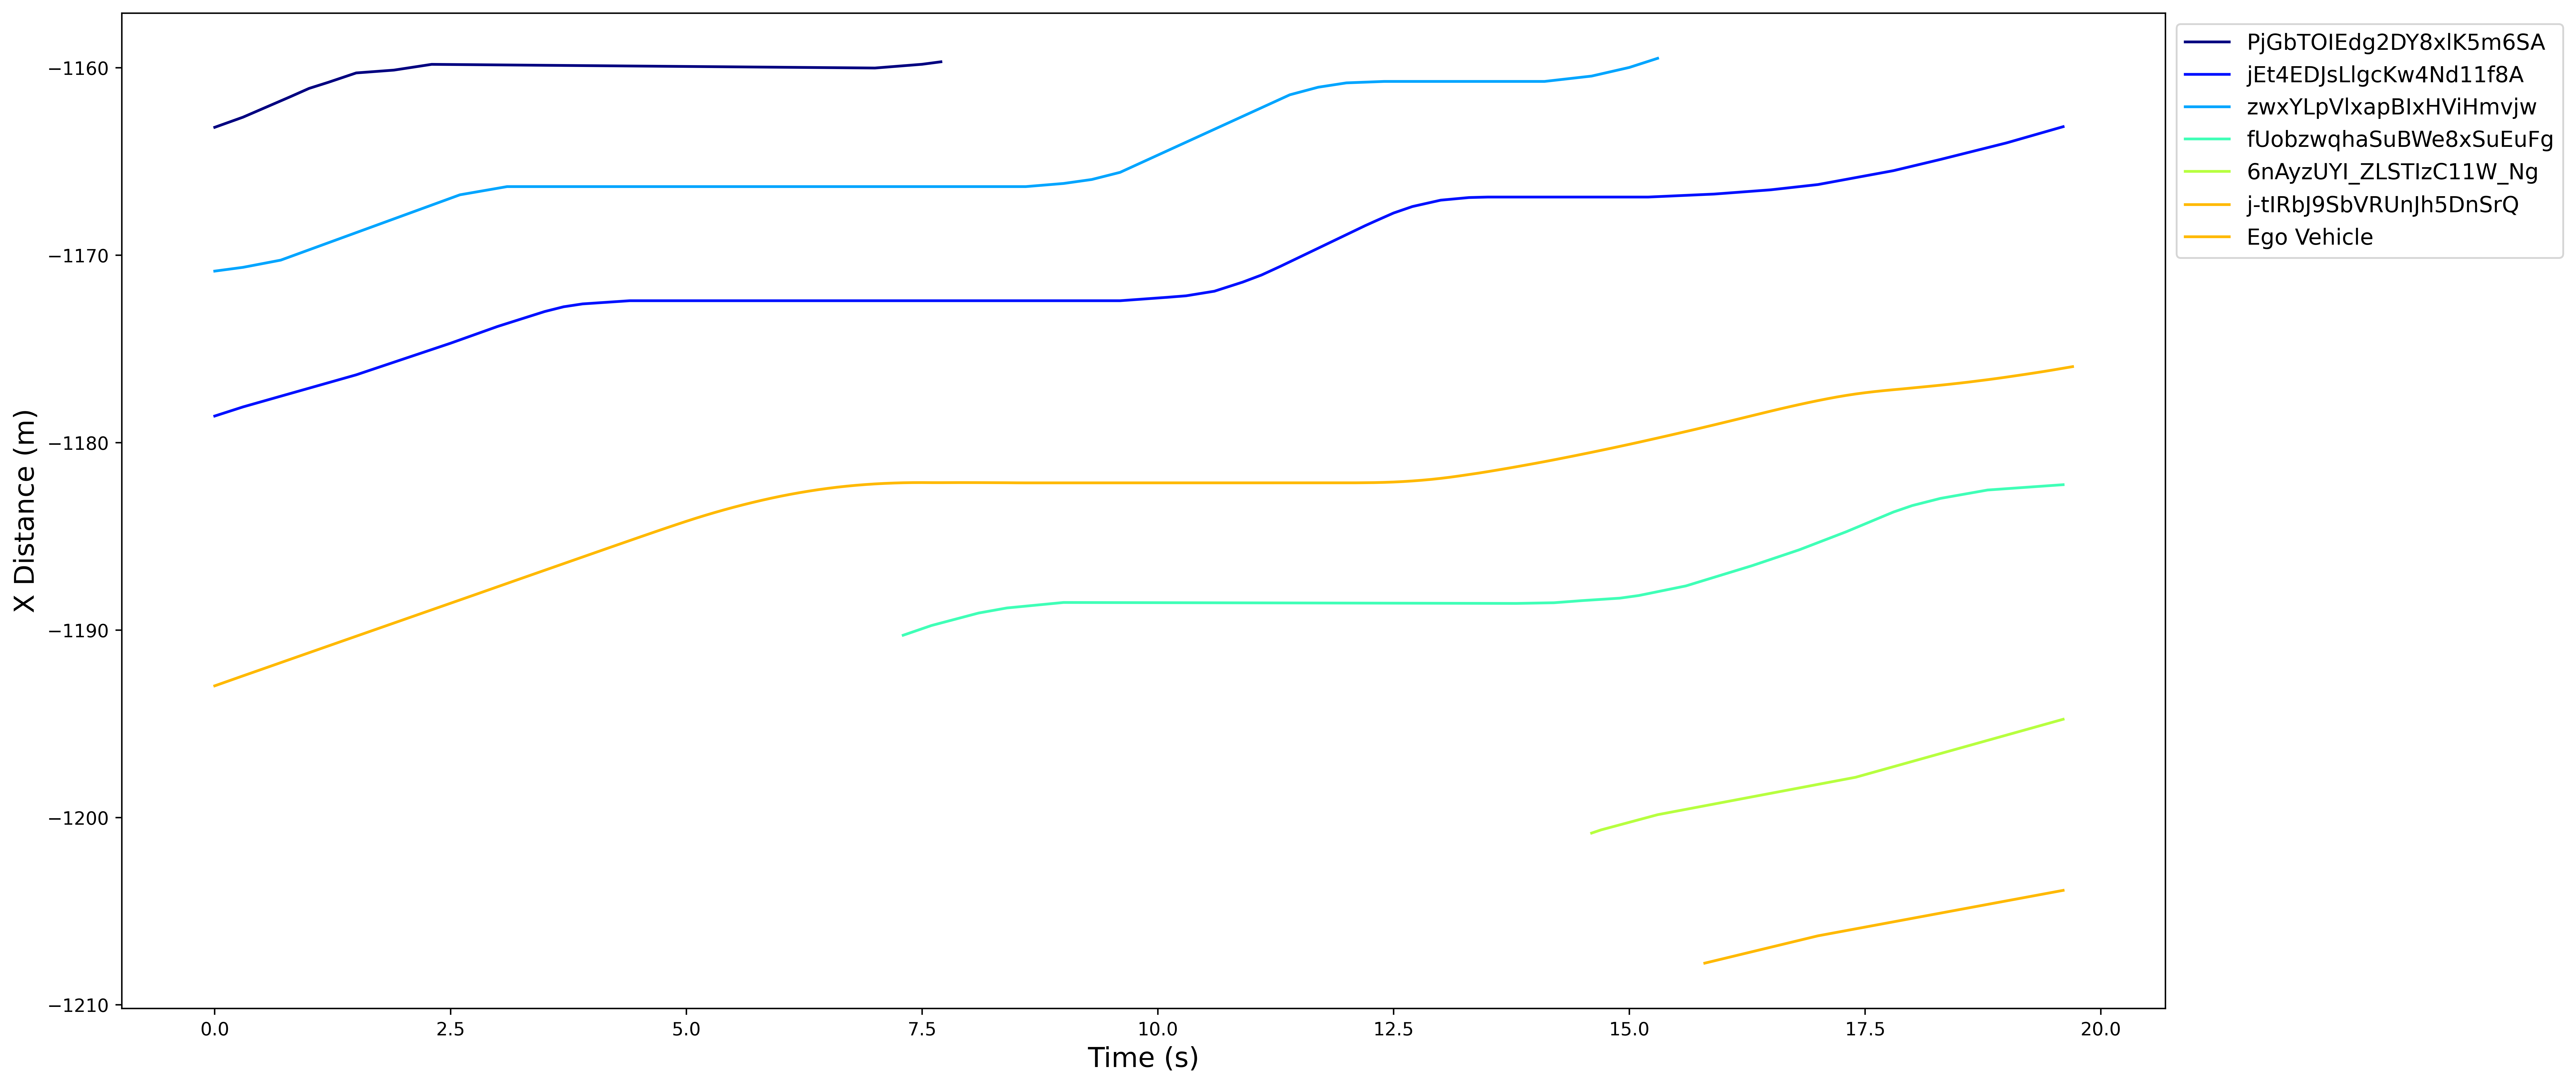

In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline

fig = plt.figure(figsize=(20, 10), dpi=500, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=len(df_list)+1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
# print (scalarMap.get_clim())


for x in range(len(df_list)):
    timestamps = df_list[x]['frame no'].to_numpy()
    timestamps = np.delete(timestamps, -1)
    x_values = df_list[x]['absX'].to_numpy()
    x_values = np.delete(x_values, -1)
    colorVal = scalarMap.to_rgba(range(len(df_list)+1)[x])
    ax.plot(timestamps/10.0, x_values, color=colorVal, label=df_list[x]["tracking ID"].iloc[0])
    

timestamps = DataFrame['frame no'].to_numpy()
timestamps = np.delete(timestamps, -1)
x_values = DataFrame['egoX'].to_numpy()
x_values = np.delete(x_values, -1)
ax.plot(timestamps/10.0, x_values, color=colorVal, label='Ego Vehicle')
ax.legend(fontsize=12, bbox_to_anchor=(1.0,1.0))
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('X Distance (m)', fontsize=15)
plt.show()

In [35]:
IDs_list = []
for ID in IDs:
    ID_data = DataFrame.loc[DataFrame['tracking ID'] == ID]
    ID_df = pd.DataFrame(ID_data['absX'].values, columns=[ID])
    ID_df.reset_index(drop=True, inplace=True)
    IDs_list.append(ID_df)
ID_data = DataFrame.loc[DataFrame['tracking ID'] == IDs[0]]
egoValues_df = pd.DataFrame(ID_data['egoX'].values, columns=['egoX'])
egoValues_df.reset_index(drop=True, inplace=True)
IDs_list.append(egoValues_df)
# print(egoValues_df)
result = pd.concat(IDs_list, axis=1)
min_val = min(result.min().values)
result = result - min_val
result.to_excel('SelectedShockWaves/' + original_excel_file[:-5] + '_filtered.xlsx')


In [ ]:
fig = plt.figure(figsize=(20, 10), dpi=500, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=len(df_list)+1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
# print (scalarMap.get_clim())


for x in range(len(df_list)):
    timestamps = df_list[x]['frame no'].to_numpy()
    timestamps = np.delete(timestamps, -1)
    y_values = df_list[x]['absY'].to_numpy()
    y_values = np.delete(y_values, -1)
    colorVal = scalarMap.to_rgba(range(len(df_list)+1)[x])
    ax.plot(timestamps/10.0, y_values, color=colorVal, label=df_list[x]["tracking ID"].iloc[0])
    

timestamps = DataFrame['frame no'].to_numpy()
timestamps = np.delete(timestamps, -1)
y_values = DataFrame['egoY'].to_numpy()
y_values = np.delete(y_values, -1)
ax.plot(timestamps/10.0, y_values, color=colorVal, label='Ego Vehicle')
ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Y Distance (m)')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 10), dpi=500, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=len(df_list)+1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)


for x in range(len(df_list)):
    timestamps = df_list[x]['frame no'].to_numpy()
    timestamps = np.delete(timestamps, -1)
    x_values = df_list[x]['absX'].to_numpy()
    y_values = df_list[x]['absY'].to_numpy()
    abs_distance = np.sqrt(np.square(x_values) + np.square(y_values))
    abs_distance = np.delete(abs_distance, -1)
    colorVal = scalarMap.to_rgba(range(len(df_list)+1)[x])
    ax.plot(timestamps/10.0, abs_distance, color=colorVal, label=df_list[x]["tracking ID"].iloc[0])
    

timestamps = DataFrame['frame no'].to_numpy()
timestamps = np.delete(timestamps, -1)
x_values = DataFrame['egoX'].to_numpy()
y_values = DataFrame['egoY'].to_numpy()
abs_distance = np.sqrt(np.square(x_values) + np.square(y_values))
abs_distance = np.delete(abs_distance, -1)
ax.plot(timestamps/10.0, abs_distance, color=colorVal, label='Ego Vehicle')
ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Abs Distance (m)')
plt.show()